<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1">Import Modules</a></span></li><li><span><a href="#General-Outline" data-toc-modified-id="General-Outline-2">General Outline</a></span><ul class="toc-item"><li><span><a href="#Hypothesis:--Does-inclusion-of-consumer-confiden-index-(cci)-improve-model-prediction-score-for-sales?" data-toc-modified-id="Hypothesis:--Does-inclusion-of-consumer-confiden-index-(cci)-improve-model-prediction-score-for-sales?-2.1">Hypothesis:  Does inclusion of consumer confiden index (cci) improve model prediction score for sales?</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3">Import data</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4">Data</a></span><ul class="toc-item"><li><span><a href="#Description-of-columns-and-values--" data-toc-modified-id="Description-of-columns-and-values---4.1">Description of columns and values -</a></span><ul class="toc-item"><li><span><a href="#--stores.csv" data-toc-modified-id="--stores.csv-4.1.1">- stores.csv</a></span></li><li><span><a href="#--train.csv" data-toc-modified-id="--train.csv-4.1.2">- train.csv</a></span></li><li><span><a href="#--test.csv" data-toc-modified-id="--test.csv-4.1.3">- test.csv</a></span></li><li><span><a href="#--features.csv" data-toc-modified-id="--features.csv-4.1.4">- features.csv</a></span></li><li><span><a href="#--Consumer-Confidence-Indicator" data-toc-modified-id="--Consumer-Confidence-Indicator-4.1.5">- Consumer Confidence Indicator</a></span></li></ul></li></ul></li><li><span><a href="#Consumer-Confidence-Index" data-toc-modified-id="Consumer-Confidence-Index-5">Consumer Confidence Index</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-5.1">Summary:</a></span></li></ul></li><li><span><a href="#Stores.csv-Data-Wrangling" data-toc-modified-id="Stores.csv-Data-Wrangling-6">Stores.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-6.1">Summary:</a></span></li></ul></li><li><span><a href="#Test.csv-Data-Wrangling" data-toc-modified-id="Test.csv-Data-Wrangling-7">Test.csv Data Wrangling</a></span></li><li><span><a href="#Train.csv-Data-Wrangling" data-toc-modified-id="Train.csv-Data-Wrangling-8">Train.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-8.1">Summary:</a></span></li></ul></li><li><span><a href="#Features.csv-Data-Wrangling" data-toc-modified-id="Features.csv-Data-Wrangling-9">Features.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-9.1">Summary:</a></span></li><li><span><a href="#Missing-Values-and-How-to-Deal-With" data-toc-modified-id="Missing-Values-and-How-to-Deal-With-9.2">Missing Values and How to Deal With</a></span></li><li><span><a href="#Markdown-Values-Missing" data-toc-modified-id="Markdown-Values-Missing-9.3">Markdown Values Missing</a></span></li><li><span><a href="#'CPI'-missing-values" data-toc-modified-id="'CPI'-missing-values-9.4">'CPI' missing values</a></span></li><li><span><a href="#Unemployment-Missing-Values" data-toc-modified-id="Unemployment-Missing-Values-9.5">Unemployment Missing Values</a></span></li></ul></li><li><span><a href="#DataFrame-Merge" data-toc-modified-id="DataFrame-Merge-10">DataFrame Merge</a></span><ul class="toc-item"><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-10.1">Training Data</a></span></li><li><span><a href="#Testing-Data" data-toc-modified-id="Testing-Data-10.2">Testing Data</a></span></li></ul></li></ul></div>

# Import Modules

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import datetime

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

# General Outline

## Hypothesis:  Does inclusion of consumer confiden index (cci) improve model prediction score for sales?

Procedure:

1. Build and test model without cci data.
2. Build and test model with cci data.
3.  Compare and note differences between with/without cci data.

Download data

1.  consumer price index:  

four dataframes: 
- df_stores 
- df_features
- df_test
- df_train

# Import data

In [95]:
df_stores = pd.read_csv('./capstone 3 project data/stores.csv')

In [96]:
df_features = pd.read_csv('./capstone 3 project data/features.csv',
                        parse_dates = True, index_col='Date')

In [97]:
df_test = pd.read_csv('./capstone 3 project data/test.csv', parse_dates = True, index_col='Date')

In [98]:
df_train = pd.read_csv('./capstone 3 project data/train.csv', parse_dates = True, index_col='Date')

In [99]:
# https://data.oecd.org/leadind/consumer-confidence-index-cci.htm
df_cci = pd.read_csv('./capstone 3 project data/us_consumer_confidence.csv', 
                     parse_dates = True, index_col='TIME')

# Data

## Description of columns and values - 

from kaggle.com-

### - stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

### - train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number <br>
Dept - the department number <br>
Date - the week <br>
Weekly_Sales -  sales for the given department in the given store <br>
IsHoliday - whether the week is a special holiday week <br>

### - test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

### - features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number <br>
Date - the week <br>
Temperature - average temperature in the region <br>
Fuel_Price - cost of fuel in the region <br>
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. <br>
CPI - the consumer price index <br>
Unemployment - the unemployment rate <br>
IsHoliday - whether the week is a special holiday week <br>
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 <br>
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 <br>
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 <br>
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 <br>

### - Consumer Confidence Indicator

from https://www.investopedia.com/insights/understanding-consumer-confidence-index/:

"Since consumer spending is so important to the nation's financial health, the Consumer Confidence Index is one of the most accurate and closely watched economic indicators. The index is based on a survey of five questions posed to 5,000 households, measuring their optimism on the economy's health."

Consumer Confidence Data from: https://data.oecd.org/leadind/consumer-confidence-index-cci.htm

LOCATION - Country ID <br>
INDICATOR -  Economic metric ID <br>
SUBJECT - <br>
MEASURE - <br>
FREQUENCY - time period of measurement reporting <br>
TIME - date <br>
Value - value of economic indicator <br>
Flag Codes - Code ID <br>

# Consumer Confidence Index

## Summary:

count	66.000000 <br>
mean	98.305140 <br>
std	0.693007 <br>
min	96.237700 <br>
25%	97.919050 <br>
50%	98.426900 <br>
75%	98.699375 <br>
max	99.228900 <br>


In [100]:
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2008-09-01 to 2021-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    308 non-null    object 
 1   INDICATOR   308 non-null    object 
 2   SUBJECT     308 non-null    object 
 3   MEASURE     308 non-null    object 
 4   FREQUENCY   308 non-null    object 
 5   Value       308 non-null    float64
 6   Flag Codes  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 19.2+ KB


In [101]:
df_cci.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
2008-09-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,97.19665,NaN
2008-10-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.88356,NaN
2008-11-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.59681,NaN
2008-12-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.42375,NaN
2009-01-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.33321,NaN


In [102]:
# check for null/nan values
df_cci['LOCATION'].isna().sum()

0

In [103]:
# filter location for USA. values
df_cci = df_cci[df_cci['LOCATION'] == 'USA']
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2008-09-01 to 2021-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    154 non-null    object 
 1   INDICATOR   154 non-null    object 
 2   SUBJECT     154 non-null    object 
 3   MEASURE     154 non-null    object 
 4   FREQUENCY   154 non-null    object 
 5   Value       154 non-null    float64
 6   Flag Codes  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 9.6+ KB


In [104]:
df_cci.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Value',
       'Flag Codes'],
      dtype='object')

In [105]:
df_cci = df_cci.rename(columns = {"Value":"cci_value"})
df_cci = df_cci.drop(columns = ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY',
       'Flag Codes'])

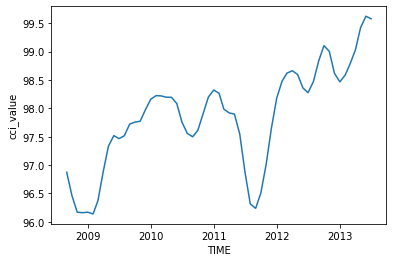

In [106]:
# filter for time period. drop all columns except 'VALUE'
df_ = df_cci.reset_index().loc[0:58]

sns.lineplot(x=df_.TIME, y=df_['cci_value']);

In [107]:
# create isocalendar feature.
df_cci = df_cci.reset_index()
df_cci['isocalendar']= df_cci['TIME'].apply(lambda x: x.isocalendar()[0:2])
df_cci=df_cci.drop(columns='TIME')
df_cci

,cci_value,isocalendar
0,96.87313,"(2008, 36)"
1,96.46582,"(2008, 40)"
2,96.16968,"(2008, 44)"
3,96.16106,"(2008, 49)"
4,96.16938,"(2009, 1)"
...,...,...
149,99.14902,"(2021, 5)"
150,99.56915,"(2021, 9)"
151,99.86069,"(2021, 13)"
152,99.81796,"(2021, 17)"


# Stores.csv Data Wrangling

## Summary:

Examine Type, Size values

1.  There are three store types.  Appear to be sorted by Size (square footage).  However, boxplots show one or two outliers in each type.  Maybe outlier stores should be reclassified? To be answered in exploratory data analysis.

    A.  Following stores identified as outliers in their respective Type:
    
    Type 'A':  Stores 33, 36.  Located outside lower bounds of Type 'B' distribution. Falls into Type 'C' size distribution bounds. <br>
    Type 'B':  Stores 5, 3.  Located outside lower bounds of Type 'B' distribution. Falls into Type 'C' size distribution bounds. <br>
    Type 'C':  Store 30.  Located outside upper bounds.  However, not large enough to qualify for B, C Type. <br>


2.  There are 22 'A' Type stores, 17 'B' Type stores, and 6 'C' Type Stores.
    Store Type will be an important feature going forward when analyzing feature relationship.  <br>


3.  Grouping the data by store type and computing median of each group

    A type store median size: 202406.0 <br>
    B type store median size: 114533.0 <br>
    C type store median size: 39910.0

In [108]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [109]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [110]:
#  inspect df_stores for missing, nan values.  no missing values
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [111]:
# "Type" Feature unique value counts
df_stores.Type.astype('category')
df_stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [112]:
# describe 'Size' statistics for each store 'Type' 

print("A Type Store: \n{}".format(df_stores[df_stores['Type'] == 'A']['Size'].describe()))
print("\nB Type Store: \n{}".format(df_stores[df_stores['Type'] == 'B']['Size'].describe()))
print("\nC Type Store: \n{}".format(df_stores[df_stores['Type'] == 'C']['Size'].describe()))

A Type Store: 
count        22.000000
mean     177247.727273
std       49392.621098
min       39690.000000
25%      155840.750000
50%      202406.000000
75%      203819.000000
max      219622.000000
Name: Size, dtype: float64

B Type Store: 
count        17.000000
mean     101190.705882
std       32371.137916
min       34875.000000
25%       93188.000000
50%      114533.000000
75%      123737.000000
max      140167.000000
Name: Size, dtype: float64

C Type Store: 
count        6.000000
mean     40541.666667
std       1304.145033
min      39690.000000
25%      39745.000000
50%      39910.000000
75%      40774.000000
max      42988.000000
Name: Size, dtype: float64


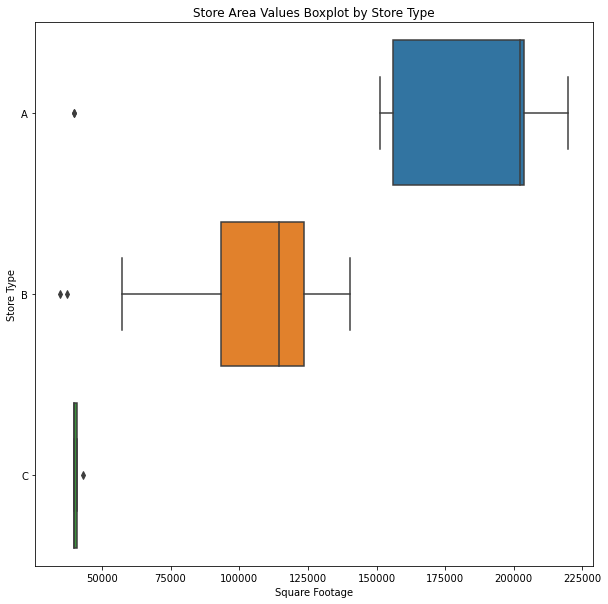

In [113]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,10))

# Create a boxplot
sns.boxplot(data=df_stores,
         y='Type',
         x='Size')

# Create a more descriptive x axis label
ax.set(xlabel="Square Footage", ylabel='Store Type')

# Add the title
ax.set_title("Store Area Values Boxplot by Store Type")
plt.show();

In [114]:
# Two Type 'A' outliers:  Stores 33, 36.  Possible error in Type value?
df_stores[df_stores['Type'] == 'A'].sort_values('Size').head(5)

,Store,Type,Size
32,33,A,39690
35,36,A,39910
0,1,A,151315
25,26,A,152513
7,8,A,155078


In [115]:
# Two Type 'B' outliers:  Stores 5, 3.  Possible error in Type value?
df_stores[df_stores['Type'] == 'B'].sort_values('Size').head(5)

,Store,Type,Size
4,5,B,34875
2,3,B,37392
15,16,B,57197
6,7,B,70713
16,17,B,93188


In [116]:
# Single Type 'C' outlier: Store 30.  Still too small to be grouped with Type 'B'

df_stores[df_stores['Type'] == 'C'].sort_values('Size', ascending=False).head(2)

,Store,Type,Size
29,30,C,42988
42,43,C,41062


In [117]:
# each store type group shows some overlap with over store types in size values distribution.  
# there is a large difference between mean and median values for Type "A" store sizes.

print("A type store median size: {0} \nB type store median size: {1} \nC type store median size: {2}".format(
    df_stores[df_stores['Type'] == 'A']['Size'].median(), df_stores[df_stores['Type'] == 'B']['Size'].median(),
    df_stores[df_stores['Type'] == 'C']['Size'].median()))

A type store median size: 202406.0 
B type store median size: 114533.0 
C type store median size: 39910.0


# Test.csv Data Wrangling

1. Test.csv shape 115064,3
2. Daterange spans 2012-11-02 to 2013-07-26
3. for a given date, IsHoliday values match IsHoliday values from df_features.

In [118]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115064 entries, 2012-11-02 to 2013-07-26
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Store      115064 non-null  int64
 1   Dept       115064 non-null  int64
 2   IsHoliday  115064 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 2.7 MB


In [119]:
df_test[['Store','Dept','IsHoliday']].value_counts()


Store  Dept  IsHoliday
22     49    False        36
21     27    False        36
20     90    False        36
       87    False        36
       85    False        36
                          ..
23     45    True          1
5      45    True          1
6      45    True          1
17     99    True          1
12     96    True          1
Length: 6218, dtype: int64

In [120]:
# encode IsHoliday features
df_test['IsHoliday'] = df_test['IsHoliday'].astype(int)
df_test.head()

,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,0
2012-11-09,1,1,0
2012-11-16,1,1,0
2012-11-23,1,1,1
2012-11-30,1,1,0


In [121]:
df_test.tail()

,Store,Dept,IsHoliday
Date,,,
2013-06-28,45,98,0
2013-07-05,45,98,0
2013-07-12,45,98,0
2013-07-19,45,98,0
2013-07-26,45,98,0


# Train.csv Data Wrangling

## Summary:

Reindexed dataframe using Date.

1.  df_train shape: 421570, 4.  421,570 entries.  4 Features.  <br>
    A.  Categorical: Store, Department, IsHoliday  <br>
    B.  Numerical:  Weekly_Sales  <br>
2.  No missing/NaN values found.
3.  There are 81 unique values for Dept. feature
4.  Date range: 2010-02-05 thru 2012-10-26


In [122]:
# df_train shape: 421570 entries, 4 Features

print("df_train shape: {}".format(df_train.shape))
df_train.head(), df_train.tail()

df_train shape: (421570, 4)


(            Store  Dept  Weekly_Sales  IsHoliday
 Date                                            
 2010-02-05      1     1      24924.50      False
 2010-02-12      1     1      46039.49       True
 2010-02-19      1     1      41595.55      False
 2010-02-26      1     1      19403.54      False
 2010-03-05      1     1      21827.90      False,
             Store  Dept  Weekly_Sales  IsHoliday
 Date                                            
 2012-09-28     45    98        508.37      False
 2012-10-05     45    98        628.10      False
 2012-10-12     45    98       1061.02      False
 2012-10-19     45    98        760.01      False
 2012-10-26     45    98       1076.80      False)

In [123]:
# check info.  check for missing/nan values.  no missing/nan values found.
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [124]:
# change Dept and Store values to category type.  The feature values do not reflect a measurable quantity.

df_train.Dept = df_train.Dept.astype('category')
df_train.Store = df_train.Store.astype('category')

In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Dept          421570 non-null  category
 2   Weekly_Sales  421570 non-null  float64 
 3   IsHoliday     421570 non-null  bool    
dtypes: bool(1), category(2), float64(1)
memory usage: 7.6 MB


In [126]:
# How many unique 'Dept' values?
print("There are {} unique values in 'Dept' feature".format(df_train.Dept.nunique()))

# value counts for each Dept
df_train.Dept.value_counts()


There are 81 unique values in 'Dept' feature


1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [127]:
# function to find which departments are found in a store?  

def dept_count(store_num):
    return df_train[df_train['Store'] == store_num]['Dept'].nunique()


In [128]:
list_ = df_train.Store.value_counts().keys().tolist()
list_
num_ = [dept_count(x) for x in list_]

uhhh = pd.DataFrame(list(zip(list_,num_)), columns = ['store', 'dept_count'])
uhhh.count()

order_ = uhhh.sort_values('dept_count').store

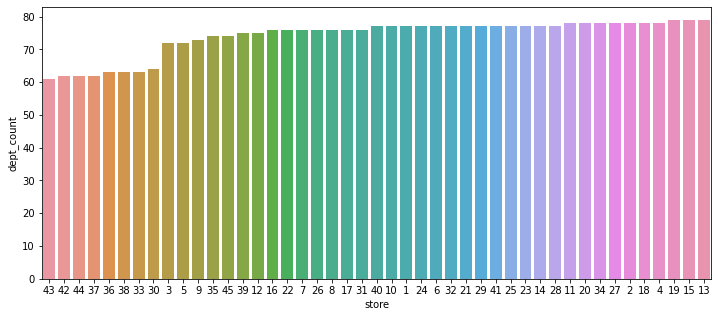

In [129]:
# countplot of depts in each store
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=uhhh, x='store',
         y='dept_count', order = order_ )

plt.show();


In [130]:
order_dept = df_train.Dept.value_counts().sort_values().keys().to_list()

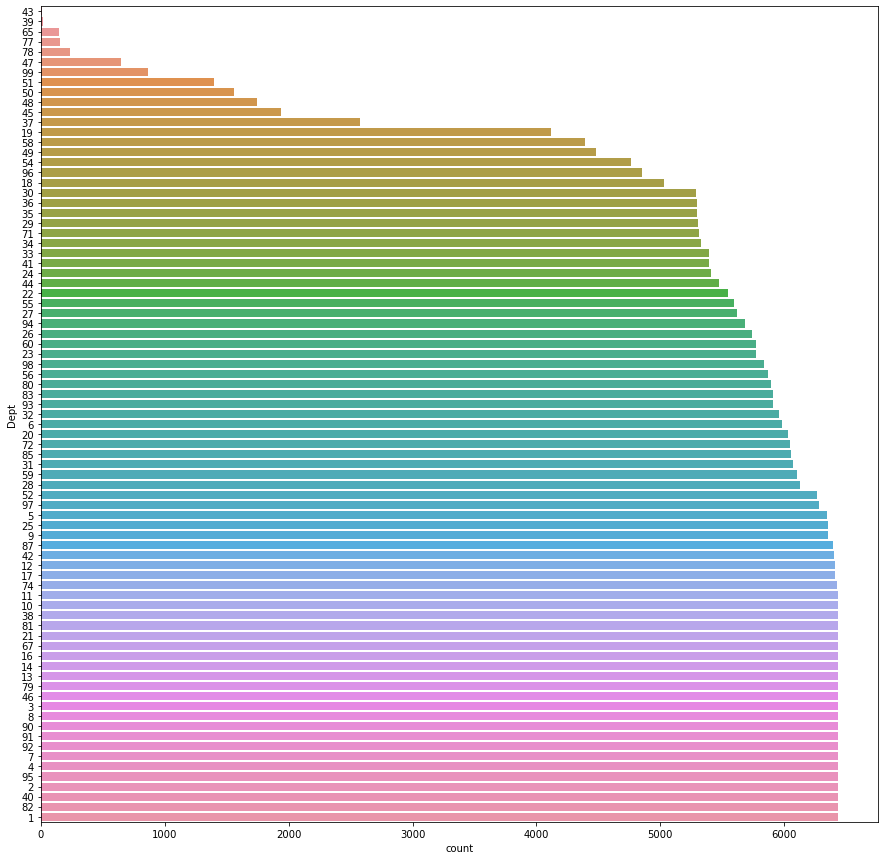

In [131]:
# Show a countplot 
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(data=df_train,
         y="Dept", order=order_dept)

plt.show();


Checking Holiday Periods are Marked Correctly

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 

In [132]:
# dates correctly matching IsHoliday == True values
df_train.query('IsHoliday == True').groupby('Date').count()


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-12,2956,2956,2956,2956
2010-09-10,2937,2937,2937,2937
2010-11-26,2938,2938,2938,2938
2010-12-31,2943,2943,2943,2943
2011-02-11,2938,2938,2938,2938
2011-09-09,2958,2958,2958,2958
2011-11-25,3021,3021,3021,3021
2011-12-30,3003,3003,3003,3003
2012-02-10,3001,3001,3001,3001


In [133]:
df_train

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False
...,...,...,...,...
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False


In [134]:
# encode IsHoliday features
df_train['IsHoliday'] = df_train['IsHoliday'].astype(int)
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,0
2010-02-12,1,1,46039.49,1
2010-02-19,1,1,41595.55,0
2010-02-26,1,1,19403.54,0
2010-03-05,1,1,21827.90,0


In [135]:
# reset index for merging process later

df_train = df_train.reset_index()

# Features.csv Data Wrangling

## Summary:

Reindexed dataframe using Date.  

1.  df_train shape: (8190, 11).  8,190 entries.  11 Features. <br>
    A.  Categorical: Store, IsHoliday <br>
    B.  Numerical:  Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment
2.  Date ranges from 2010-02-05 thru 2013-07-26.  Training.csv and Features.csv date ranges are not exact match.  Feature entries size will be adjust to match training set. <br>
3.  MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 have significant amount of NaN values.  Boxplot and histogram plots of each features

 

In [136]:
# Note datetime index range
print(df_features.shape)
df_features.info()

(8190, 11)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Temperature   8190 non-null   float64
 2   Fuel_Price    8190 non-null   float64
 3   MarkDown1     4032 non-null   float64
 4   MarkDown2     2921 non-null   float64
 5   MarkDown3     3613 non-null   float64
 6   MarkDown4     3464 non-null   float64
 7   MarkDown5     4050 non-null   float64
 8   CPI           7605 non-null   float64
 9   Unemployment  7605 non-null   float64
 10  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


In [137]:
df_features = df_features.reset_index()

In [138]:
df_features['isocalendar'] = df_features['Date'].apply(lambda x: x.isocalendar()[0:2])
df_features['isocalendar']

0        (2010, 5)
1        (2010, 6)
2        (2010, 7)
3        (2010, 8)
4        (2010, 9)
           ...    
8185    (2013, 26)
8186    (2013, 27)
8187    (2013, 28)
8188    (2013, 29)
8189    (2013, 30)
Name: isocalendar, Length: 8190, dtype: object

In [139]:
df_features['Week'] = df_features['Date'].apply(lambda x: x.isocalendar()[1])
df_features['Week']

0        5
1        6
2        7
3        8
4        9
        ..
8185    26
8186    27
8187    28
8188    29
8189    30
Name: Week, Length: 8190, dtype: int64

In [140]:
df_features

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar,Week
0,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,"(2010, 5)",5
1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,"(2010, 6)",6
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,"(2010, 7)",7
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,"(2010, 8)",8
4,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,"(2010, 9)",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,2013-06-28,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,"(2013, 26)",26
8186,2013-07-05,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,"(2013, 27)",27
8187,2013-07-12,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,"(2013, 28)",28
8188,2013-07-19,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,"(2013, 29)",29


In [141]:
df_features['isocalendar']

0        (2010, 5)
1        (2010, 6)
2        (2010, 7)
3        (2010, 8)
4        (2010, 9)
           ...    
8185    (2013, 26)
8186    (2013, 27)
8187    (2013, 28)
8188    (2013, 29)
8189    (2013, 30)
Name: isocalendar, Length: 8190, dtype: object

In [142]:
# Note datetime index range
print(df_features.shape)
df_features.info()

(8190, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8190 non-null   datetime64[ns]
 1   Store         8190 non-null   int64         
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  isocalendar   8190 non-null   object        
 13  Week          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 

## Missing Values and How to Deal With

## Markdown Values Missing

In [143]:
# Percentage of values for each features that are missing
df_features.isna().sum()/8190 * 100

Date             0.000000
Store            0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
isocalendar      0.000000
Week             0.000000
dtype: float64

In [144]:
# stats omit NaN values in each columns
df_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000
mean,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422
std,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278
min,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000
25%,1577.532500,68.880000,6.600000,304.687500,1440.827500
50%,4743.580000,364.570000,36.260000,1176.425000,2727.135000
75%,8923.310000,2153.350000,163.150000,3310.007500,4832.555000
max,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000


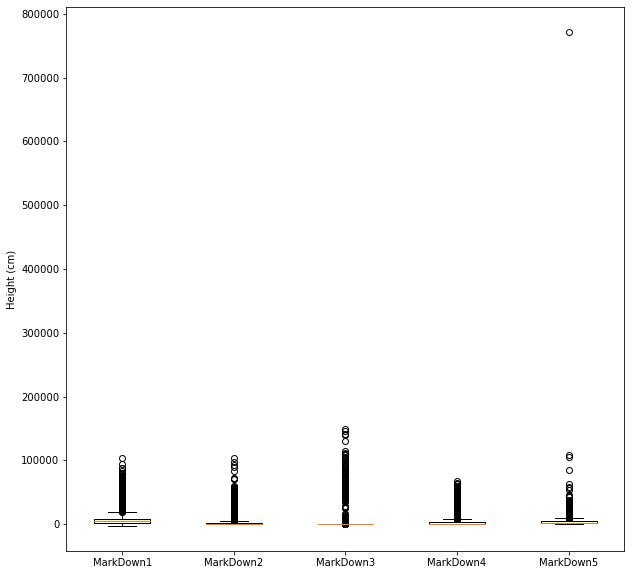

In [145]:
# A Boxplot of MarkDown values.  MarkDown5 outlier @ 800000 an error?

#Basic boxplot
fig, ax = plt.subplots(figsize=(10,10))

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([df_features['MarkDown1'].dropna(), df_features['MarkDown2'].dropna(), 
            df_features['MarkDown3'].dropna(), df_features['MarkDown4'].dropna(),
           df_features['MarkDown5'].dropna()])

# Add x-axis tick labels:
ax.set_xticklabels(["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

In [146]:
# MarkDown5 outlier @ 800000 an error?

df_features['MarkDown5'].sort_values(na_position='first')


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
7044     63005.58
7041     85851.87
7043    105223.11
7042    108519.28
5059    771448.10
Name: MarkDown5, Length: 8190, dtype: float64

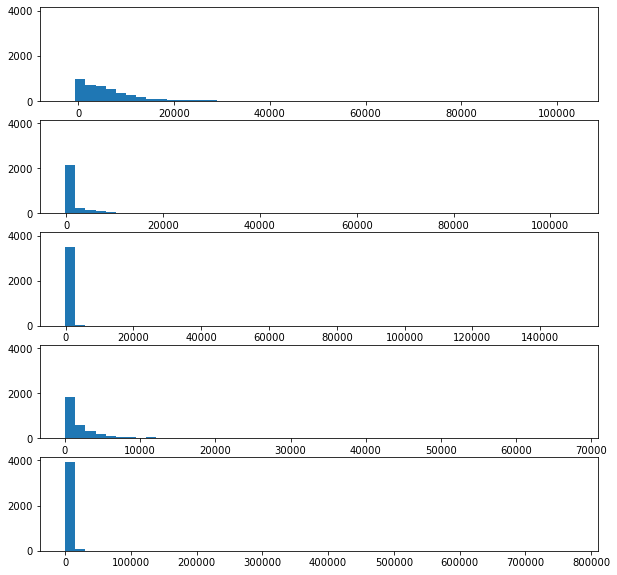

In [147]:
# MarkDown Histograms:  Distribution normal?

# Create a Figure and an array of subplots with 5 rows
fig, ax = plt.subplots(5,1, figsize=(10,10), sharey=True)


ax[0].hist(df_features["MarkDown1"], bins=50)
ax[1].hist(df_features["MarkDown2"], bins=50)
ax[2].hist(df_features["MarkDown3"], bins=50)
ax[3].hist(df_features["MarkDown4"], bins=50)
ax[4].hist(df_features["MarkDown5"], bins=50)

plt.show()

In [148]:
# for 'MarkDown' columns, fill NaN values with zeroes

df_features['MarkDown1'] = df_features.MarkDown1.fillna(0)
df_features['MarkDown2'] = df_features.MarkDown2.fillna(0)
df_features['MarkDown3'] = df_features.MarkDown3.fillna(0)
df_features['MarkDown4'] = df_features.MarkDown4.fillna(0)
df_features['MarkDown5'] = df_features.MarkDown5.fillna(0)

## 'CPI' missing values

Missing 'CPI' values are for May, June, July 2013.  The missing values were imputed using forward fill.

In [149]:
# missing CPI values are for May, June, July 2013
df_features[df_features['CPI'].isna()]

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar,Week
169,2013-05-03,1,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False,"(2013, 18)",18
170,2013-05-10,1,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False,"(2013, 19)",19
171,2013-05-17,1,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False,"(2013, 20)",20
172,2013-05-24,1,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False,"(2013, 21)",21
173,2013-05-31,1,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False,"(2013, 22)",22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,2013-06-28,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,"(2013, 26)",26
8186,2013-07-05,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,"(2013, 27)",27
8187,2013-07-12,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,"(2013, 28)",28
8188,2013-07-19,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,"(2013, 29)",29


In [150]:
# forward fill missing CPI values
df_features['CPI']=df_features['CPI'].fillna(method='ffill')

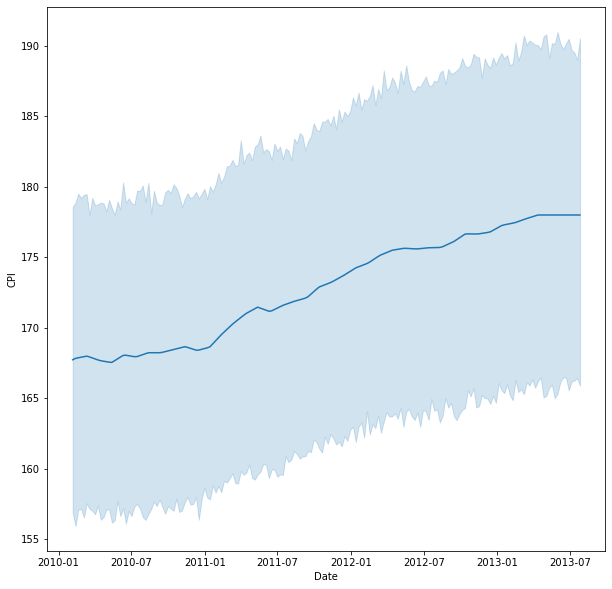

In [151]:
#lineplot of CPI
fig, ax =plt.subplots(figsize=(10,10))
sns.lineplot(data=df_features, x='Date', y='CPI')
plt.show()

In [152]:
df_features.tail()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar,Week
8185,2013-06-28,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,NaN,False,"(2013, 26)",26
8186,2013-07-05,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,NaN,False,"(2013, 27)",27
8187,2013-07-12,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,NaN,False,"(2013, 28)",28
8188,2013-07-19,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,NaN,False,"(2013, 29)",29
8189,2013-07-26,45,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,193.589304,NaN,False,"(2013, 30)",30


## Unemployment Missing Values

Missing 'Unemployment' values are for May, June, and July 2013.  The missing values were replaced using forward
fill imputation.

In [153]:
# missing unemployment values are for May, June, July 2013
df_features[df_features['CPI'].isna()]

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar,Week


In [154]:
df_features.Unemployment = df_features['Unemployment'].fillna(method='ffill')

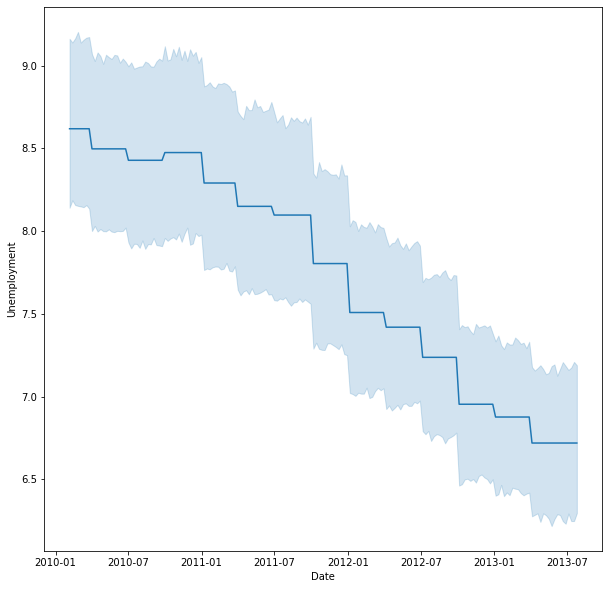

In [155]:
# Unemployment Rate Plot

fig, ax = plt.subplots(figsize = (10,10))
sns.lineplot(data = df_features, x='Date', y = 'Unemployment' )
plt.show()

# DataFrame Merge 

Train Data:
1.  Merge df_features with df_train.
2.  Using result from Step 1, Merge with df_cci.  Drop 'Time' column.  Forward fill 'cci_value'.
3.  Verify resulting dataframe entries count matches with df_train entries count.
4.  final training data dataframe -> df_merged_train.csv

Test Data:
1.  Merge df_features with df_test.
2.  Using result from Step 1, Merge with df_cci.  Drop 'Time' column.  Forward fill 'cci_value'
3.  Verify resulting dataframe entries count matches with df_test entries count.
4.  final test data dataframe -> df_test_merge.csv

## Training Data

In [156]:
# adding in Store Type and Size columsn to df_features

print("df_features shape: {}".format(df_features.shape))
df_features.head()

df_features shape: (8190, 14)


,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar,Week
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,"(2010, 5)",5
1,2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,"(2010, 6)",6
2,2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,"(2010, 7)",7
3,2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,"(2010, 8)",8
4,2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,"(2010, 9)",9


In [157]:
# add 'Type' and 'Size' columns to df_features

df_features = df_features.merge(df_stores, how='left')
print("df_features shape after adding Type and Size: {}".format(df_features.shape))
df_features.head()

df_features shape after adding Type and Size: (8190, 16)


,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar,Week,Type,Size
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,"(2010, 5)",5,A,151315
1,2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,"(2010, 6)",6,A,151315
2,2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,"(2010, 7)",7,A,151315
3,2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,"(2010, 8)",8,A,151315
4,2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,"(2010, 9)",9,A,151315


In [158]:
df_train.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,1,24924.50,0
1,2010-02-12,1,1,46039.49,1
2,2010-02-19,1,1,41595.55,0
3,2010-02-26,1,1,19403.54,0
4,2010-03-05,1,1,21827.90,0


In [159]:
# df_train entries count
print("df_train shape: {}".format(df_train.shape))
print("\ndf_features shape: {}".format(df_features.shape))

df_train shape: (421570, 5)

df_features shape: (8190, 16)


In [160]:
# add weekly_sales, isholiday columns to features, match on dates, store, dept
df_merged_train = df_train.merge(df_features, how='inner')

print("merged dataframe shape: {}".format(df_merged_train.shape))
df_merged_train.head()

merged dataframe shape: (421570, 18)


,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315
1,2010-02-05,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315
2,2010-02-05,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315
3,2010-02-05,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315
4,2010-02-05,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315


In [161]:
# add cci features
df_merged_train = df_merged_train.merge(df_cci, on='isocalendar', how='left')

In [162]:
df_merged_train['cci_value'] = df_merged_train['cci_value'].fillna(method='ffill')

In [163]:
df_merged_train.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size,cci_value
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
1,2010-02-05,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
2,2010-02-05,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
3,2010-02-05,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
4,2010-02-05,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324


In [164]:
# df_train, df_merged_train entries count comparison

print("df_train entries shape: {}".format(df_train.shape))
print("\ndf_merged_train shape: {}".format(df_merged_train.shape))

df_train entries shape: (421570, 5)

df_merged_train shape: (421570, 19)


In [165]:
#compare columns between df_train and df_merged_train.

print("original train set features: {}".format(df_train.columns.to_list()))
print("\nadded features: {}".format(list(set(df_merged_train.columns)-set(df_train.columns))))

original train set features: ['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday']

added features: ['Type', 'MarkDown4', 'Fuel_Price', 'MarkDown3', 'Temperature', 'Unemployment', 'Size', 'MarkDown5', 'cci_value', 'CPI', 'isocalendar', 'MarkDown2', 'MarkDown1', 'Week']


In [166]:
df_merged_train.to_csv('capstone_3_train_data', index=False)

## Testing Data

In [167]:
# repeat above process with df_test
print("df_test entries shape: {}".format(df_test.shape))
df_test.head()

df_test entries shape: (115064, 3)


,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,0
2012-11-09,1,1,0
2012-11-16,1,1,0
2012-11-23,1,1,1
2012-11-30,1,1,0


In [168]:
# reset index. inner merge df_test with df_features
df_test = df_test.reset_index()
df_test_merge = df_test.merge(df_features, how='inner')
print("merge results shape: {}".format(df_test_merge.shape))

merge results shape: (115064, 17)


In [169]:
df_test_merge.head()

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size
0,2012-11-02,1,1,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315
1,2012-11-02,1,2,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315
2,2012-11-02,1,3,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315
3,2012-11-02,1,4,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315
4,2012-11-02,1,5,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315


In [170]:
df_test_merge = df_test_merge.merge(df_cci, on='isocalendar', how='left')

In [171]:
df_test_merge.head()

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size,cci_value
0,2012-11-02,1,1,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
1,2012-11-02,1,2,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
2,2012-11-02,1,3,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
3,2012-11-02,1,4,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
4,2012-11-02,1,5,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362


In [172]:
df_test_merge['cci_value'] = df_test_merge['cci_value'].fillna(method='ffill')

In [173]:
df_test_merge.head()

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size,cci_value
0,2012-11-02,1,1,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
1,2012-11-02,1,2,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
2,2012-11-02,1,3,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
3,2012-11-02,1,4,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
4,2012-11-02,1,5,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362


In [174]:
print("df_test shape: {}".format(df_test.shape))
print("df_test_merge shape: {}".format(df_test_merge.shape))

df_test shape: (115064, 4)
df_test_merge shape: (115064, 18)


In [175]:
#compare columns between df_test and df_test_merge.

print("number of features added: {}".format(df_test_merge.shape[1] - df_test.shape[1]))
print("\noriginal test set features: {}".format(df_test.columns.to_list()))
print("\nadded features: {}".format(list(set(df_test_merge.columns)-set(df_test.columns))))

number of features added: 14

original test set features: ['Date', 'Store', 'Dept', 'IsHoliday']

added features: ['Type', 'MarkDown4', 'Fuel_Price', 'MarkDown3', 'Temperature', 'Unemployment', 'Size', 'MarkDown5', 'cci_value', 'CPI', 'isocalendar', 'MarkDown2', 'MarkDown1', 'Week']


In [176]:
#compare columns between df_test and df_test_merge.  Weekly_Sales is target to be predicted using df_test_merge

print("features difference between train and test dataframes: {}".
      format(list(set(df_merged_train.columns)-set(df_test_merge.columns))))

features difference between train and test dataframes: ['Weekly_Sales']


In [177]:
df_test_merge_ = df_test_merge.to_csv('capstone_3_test_data', index=False)